In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId','Name'],inplace=True)
df.drop(columns=['Ticket'],inplace=True)

In [5]:
df.drop(columns=['Cabin'],inplace=True)

In [6]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
233,1,3,female,5.0,4,2,31.3875,S
565,0,3,male,24.0,2,0,24.1500,S
653,1,3,female,NaN,0,0,7.8292,Q
507,1,1,male,NaN,0,0,26.5500,S
435,1,1,female,14.0,1,2,120.0000,S


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2,random_state=42)


In [8]:
x_train.shape,y_train.shape

((712, 7), (712,))

In [9]:
y_test.shape,x_test.shape

((179,), (179, 7))

In [10]:
from sklearn.compose import ColumnTransformer

In [11]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [12]:

level1 =ColumnTransformer([
    ('age',SimpleImputer(),[2]),
    ('Embarked',SimpleImputer(strategy='most_frequent'),[6])
    
    
    
    ],remainder='passthrough')

In [13]:
level1.fit_transform(x_test)

array([[30.505845070422534, 'C', 3, ..., 1, 1, 15.2458],
       [31.0, 'S', 2, ..., 0, 0, 10.5],
       [20.0, 'S', 3, ..., 0, 0, 7.925],
       ...,
       [38.0, 'S', 3, ..., 1, 5, 31.3875],
       [17.0, 'S', 2, ..., 0, 0, 10.5],
       [4.0, 'S', 3, ..., 1, 1, 16.7]], shape=(179, 7), dtype=object)

In [14]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


#### one hot encoding

In [15]:
level2 = ColumnTransformer(
    [
    
    ('one_hot_encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore',dtype='int32'),[1,6])
    
]  ,remainder='passthrough')

In [16]:
level2

,transformers,"[('one_hot_encode', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [17]:
level2.fit_transform(x_train)

array([[  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  28.5   ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  13.    ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [  0.    ,   1.    ,   0.    , ...,   2.    ,   0.    ,  14.1083],
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   2.    , 120.    ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   1.    ,  77.2875]],
      shape=(712, 11))

In [18]:
level2.fit_transform(x_train)

array([[  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  28.5   ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  13.    ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [  0.    ,   1.    ,   0.    , ...,   2.    ,   0.    ,  14.1083],
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   2.    , 120.    ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   1.    ,  77.2875]],
      shape=(712, 11))

In [19]:
level3 =ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [20]:
#feature scaling

from sklearn.feature_selection import SelectKBest

In [21]:
# level4= SelectKBest(score_func=chi2,k=9)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
level5 = DecisionTreeClassifier()

In [33]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('level1',level1),
    ('level2',level2),
    ('level3',level3),
    # ('level4',level4),
    ('level5',level5)
    
    
])

In [34]:
# 
from sklearn.pipeline import make_pipeline
pipe2 = make_pipeline(level1,level2,level3,level5)

In [35]:
pipe2.fit(x_train,y_train)

,steps,"[('columntransformer-1', ...), ('columntransformer-2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('Embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
pipe.fit(x_train,y_train)

,steps,"[('level1', ...), ('level2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('Embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:

#! y pred
y_pred = pipe.predict(x_test) 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

#### cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean(     )

np.float64(0.6391214419383433)

#### grid search using pipline

In [ ]:
param ={
    
    
    "level5__max_depth":[1,2,3,4,5,None]
}

In [ ]:

from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(pipe,param,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

# from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(pipe, param, cv=5, scoring='accuracy')
# grid.fit(x_train, y_train)


,estimator,Pipeline(step...lassifier())])
,param_grid,{}
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('age', ...), ('Embarked', ...)]"




#### another way to do this thing

In [ ]:

numerical= Pipeline([
    ('one',SimpleImputer()),
    ('two',SimpleImputer(strategy='most_frequent'))
])



In [ ]:
category = Pipeline([
    ('one',OneHotEncoder(sparse_output=False,handle_unknown='ignore',dtype='int32'))
])

In [ ]:
process =ColumnTransformer([
    
    ('num',numerical),
    ('cat',category)
])

In [ ]:
Pipeline=Pipeline([
    ('pr',process),
    ('model',DecisionTreeClassifier())
])

In [ ]:
x_train,x_test

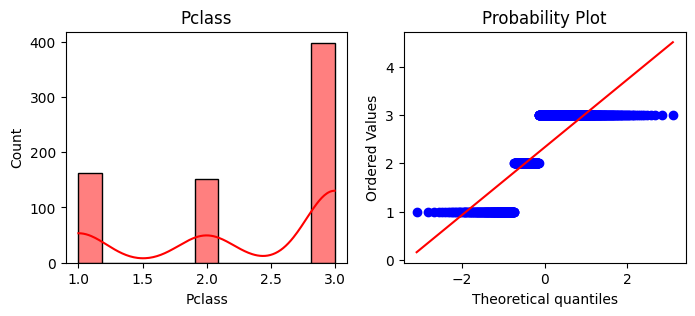

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

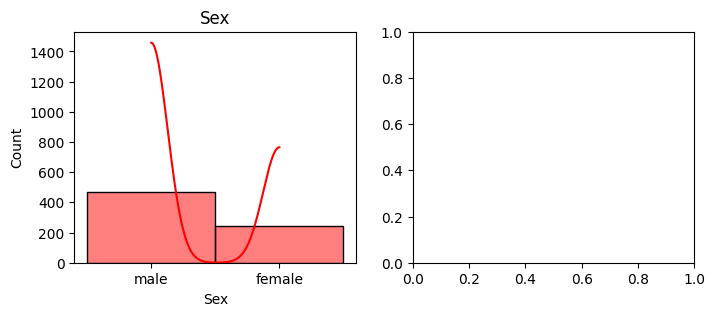

In [ ]:
for col in x_train.columns:
    fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(8,3))
    sns.histplot(x_train[col],ax=ax1,color='Red',kde=True)

    ax1.set_title(x_train[col].name)
    stats.probplot(x_train[col],dist='norm',plot=ax2)
    plt.show()
    ax1.set_title(x_train[col].name)   
    